## Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

## reading data

In [2]:
df = pd.read_csv('Life Expectancy Data Cleaned.csv')
df.head()

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015.0,0,65.0,263.0,55.0,0.01,71.279624,65.0,905.625,19.1,...,49.5,8.16,65.0,0.1,584.259210,1.085476e+07,15.35,15.6,0.479,10.1
1,2014.0,0,59.9,271.0,55.0,0.01,73.523582,62.0,492.000,18.6,...,58.0,8.18,62.0,0.1,612.696514,3.275820e+05,15.35,15.6,0.476,10.0
2,2013.0,0,59.9,268.0,55.0,0.01,73.219243,64.0,430.000,18.1,...,62.0,8.13,64.0,0.1,631.744976,1.085476e+07,15.35,15.6,0.470,9.9
3,2012.0,0,59.5,272.0,55.0,0.01,78.184215,67.0,905.625,17.6,...,67.0,8.52,67.0,0.1,669.959000,3.696958e+06,15.35,15.6,0.463,9.8
4,2011.0,0,59.2,275.0,55.0,0.01,7.097109,68.0,905.625,17.2,...,68.0,7.87,68.0,0.1,63.537231,2.978599e+06,15.35,15.6,0.454,9.5


In [3]:
df.columns

Index(['Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

## splitting the data

In [4]:
X, Y = df.drop('Life expectancy ', axis=1), df['Life expectancy ']

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## training & assessing the model

In [7]:
model = LinearRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

Accuracy: 95.96%
Mean Squared Error: 12.417655525981955
R^2 Score: 0.8561008093433328


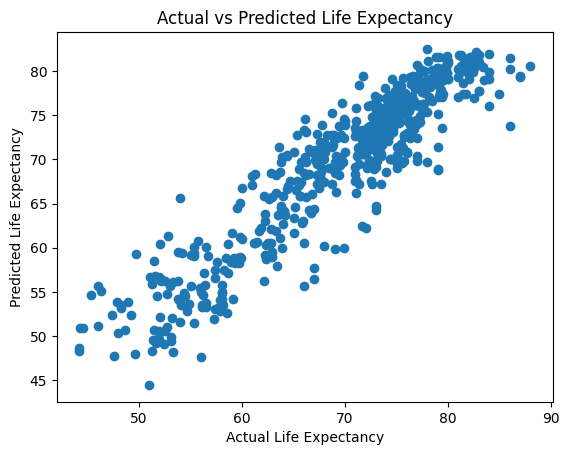

In [11]:
accuracy = np.mean(1 - np.abs((Y_test - Y_pred) / Y_test))
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')
plt.scatter(Y_test, Y_pred)
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title('Actual vs Predicted Life Expectancy')
plt.show()

Text(0.5, 1.0, 'Feature Importance')

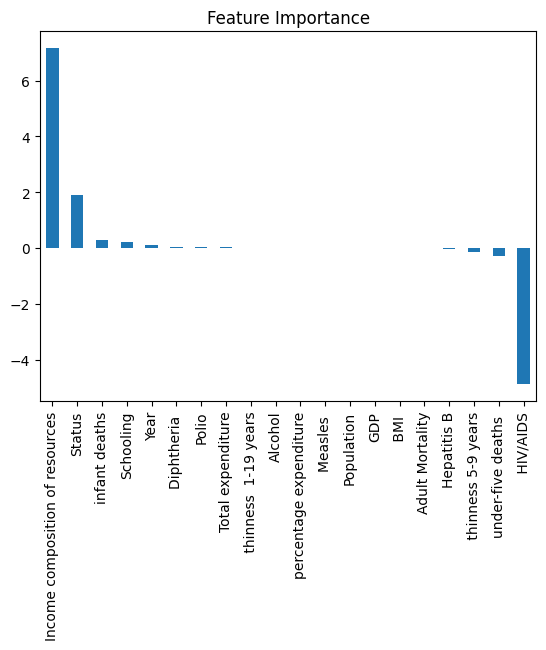

In [13]:
feature_importance = pd.Series(
    model.coef_,
    index=X.columns
).sort_values(ascending=False)

feature_importance.plot(kind='bar')
plt.title('Feature Importance')